# Implementation of neural network from scratch

NN  (Neural Network) in a machine learning algorithm that is inspired by the way the human brain works. NN is mainly used as a classification algorithm. In this article, we will look at the stepwise approach on how to implement the basic NN algorithm in NumPy(Python library) from scratch. 

We are going to build a three-letter(A, B, C) classifier, for simplicity we are going to create the letters (A, B, C) as NumPy array of 0s and 1s, also we are going to ignore the bias term related with each node. 

![image](https://media.geeksforgeeks.org/wp-content/uploads/20200526155612/neuron.jpg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The dataset 

In [2]:
# Creating data set
 
# A
a =np.array([0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1])
# B
b =np.array([0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0])
# C
c =np.array([0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0])
# D
d =np.array([0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 1,
   0, 1, 0, 0, 0, 1,
   0, 1, 0, 0, 0, 1,
   0, 1, 1, 1, 1, 0])

X = np.array([a, b, c])
 
# Creating labels
Y =np.array([[1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]])

In [3]:
X.shape, Y.shape

((3, 30), (3, 3))

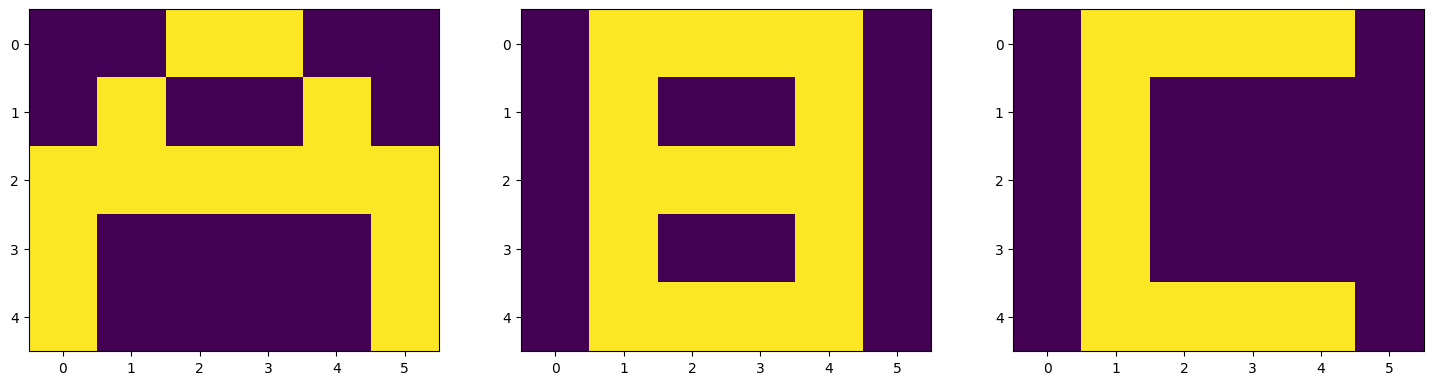

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=len(X), figsize=(18, 5))
for i, img in enumerate(X):
    ax[i].imshow(img.reshape(5, 6))
plt.show()

## Step 1 : Network architecture

The definition of the architecture includes deciding the number of layers and the number of nodes in each layer. Our neural network is going to have the following structure.

![archi](https://media.geeksforgeeks.org/wp-content/uploads/20200522110034/NURELNETWORK.jpg)

In [5]:
NN_ARCHITECTURE = [
    {"input_dim": X.shape[1], "output_dim": 5, "activation": "sigmoid"},
    {"input_dim": 5, "output_dim": 3, "activation": "softmax"},
]

In [6]:
""" A more simpler architecture """
NN_ARCHITECTURE = [
    {"input_dim": X.shape[1], "output_dim": Y.shape[1], "activation": "softmax"},
]

In [7]:
NN_ARCHITECTURE

[{'input_dim': 30, 'output_dim': 3, 'activation': 'softmax'}]

## Step 2 : Network initialisation

In [8]:
def init_layers(nn_architecture):
    # random seed initiation
    np.random.seed(1960)
    # number of layers in our neural network
    number_of_layers = len(nn_architecture)
    # parameters storage initiation
    params_values = {}
    
    # iteration over network layers
    for idx, layer in enumerate(nn_architecture):
        # we number network layers from 1
        layer_idx = idx + 1
        
        # extracting the number of units in layers
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        
        # initiating the values of the W matrix
        # and vector b for subsequent layers
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_input_size, layer_output_size) * 0.2
        params_values['b' + str(layer_idx)] = np.random.randn(
            1, layer_output_size) * 0.2
        
    return params_values
    
params_values = init_layers(NN_ARCHITECTURE)
for layers in params_values.keys():
    if layers[0]=="W":
        print(layers, ":", params_values[layers].shape)

W1 : (30, 3)


#### Definition of th activation function

Activation functions give neural networks the non-linearity and therefore the expressiveness they need.

In this project, the choice was made to offer only two of them:

* Sigmoid: $f(x)=\frac{1}{1+e^{-x}}$

* Sigmoid dérivative: $f'(x) = f(x)\cdot(1-f(x))$

* ReLU: $f(x) = \begin{cases}
0 \text{ if } x \leq 0 \\ 
x \text{ if } x > 0 
\end{cases}$

* Relu dérivative: $f'(x) = \begin{cases}
0 \text{ if } x \leq 0 \\ 
1 \text{ if } x > 0 
\end{cases}$

We must also prepare their derivatives.

In [9]:
# activation function
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def tanh(Z):
    a = np.exp(Z)
    b = np.exp(-Z)
    return (a-b)/(a+b)

def relu(Z):
    return np.maximum(0,Z)

def linear(Z):
    return Z

In [10]:
# Convert the network output into probability
# From: https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/
def softmax(Z):
    shiftx = Z - np.max(Z)
    exps = np.exp(shiftx)
    return exps / np.sum(exps)

In [11]:
# derivative of activation function (one point)
def sigmoid_prime(Z):
    sig = sigmoid(Z)
    sig = sig * (1 - sig)
    return sig

def tanh_prime(Z):
    return 1 - np.power(tanh(Z), 2)

def relu_prime(Z):
    dZ = np.ones_like(Z)
    dZ[Z <= 0] = 0
    return dZ

def linear_prime(Z):
    return np.ones_like(Z)

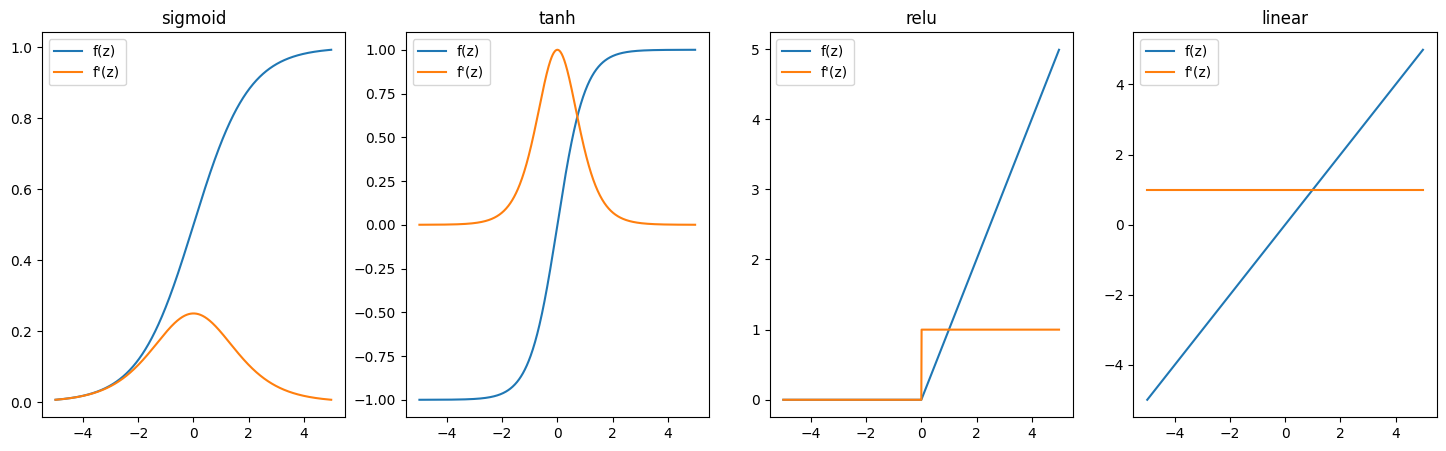

In [12]:
# Data for plotting
t = np.arange(-5.0, 5.0, 0.01).reshape((-1,1))

functions = {'sigmoid':sigmoid, 'tanh':tanh, 'relu':relu, 'linear':linear}
functions_prime = {'sigmoid':sigmoid_prime, 'tanh':tanh_prime, 'relu':relu_prime, 'linear':linear_prime}

fig, ax = plt.subplots(nrows=1, ncols=len(functions), figsize=(18, 5))

for i, (f, fP) in enumerate(zip(functions, functions_prime)):
    ax[i].plot(t, functions[f](t), label="f(z)")
    ax[i].plot(t, functions_prime[fP](t), label="f'(z)")
    ax[i].set_title(f)
    ax[i].legend()

## Forward pass (one layer)

Given the input signal of the previous layer, we calculate the transformation refines Z: $$\boldsymbol{Z}^{[l]} = \boldsymbol{W}^{[l]} \cdot \boldsymbol{A}^{[l-1]} + \boldsymbol{b}^{[l]}$$

and then apply the selected activation function: $$\boldsymbol{A}^{[l]} = g^{[l]}(\boldsymbol{Z}^{[l]})$$

In addition to the calculated matrix A, the function also returns an intermediate value of Z. We will need Z during the backward phase.

In [13]:
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation):
    # calculation of the input value for the activation function
    #print("dot(A_prev, W_curr) + b_curr", A_prev.shape, W_curr.shape, b_curr.shape)
    Z_curr = np.dot(A_prev, W_curr) + b_curr
    
    # selection of activation function
    if activation == "linear":
        activation_func = linear
    elif activation == "relu":
        activation_func = relu
    elif activation == "sigmoid":
        activation_func = sigmoid
    elif activation == "tanh":
        activation_func = tanh
    elif activation == "softmax":
        activation_func = softmax
    else:
        raise Exception('Non-supported activation function: '+activation)
        
    # return of calculated activation A and the intermediate Z matrix
    return activation_func(Z_curr), Z_curr

In [14]:
# Apply one forward pass for one observation
params_values = init_layers(NN_ARCHITECTURE)
Y_pred, memory = single_layer_forward_propagation(np.array([X[0]]),
                                                  params_values['W1'], params_values['b1'],
                                                  NN_ARCHITECTURE[0]['activation'])
Y_pred.shape, Y_pred[0]

((1, 3), array([0.69827823, 0.18411572, 0.11760605]))

In [15]:
# Apply one forward pass for all observations
params_values = init_layers(NN_ARCHITECTURE)
Y_pred, memory = single_layer_forward_propagation(X,
                                                  params_values['W1'], params_values['b1'],
                                                  NN_ARCHITECTURE[0]['activation'])
Y_pred.shape, Y_pred

((3, 3),
 array([[0.32418661, 0.08547861, 0.05460045],
        [0.13498648, 0.05031936, 0.13552082],
        [0.08994354, 0.06496233, 0.06000179]]))

In [16]:
# Predict classes
np.argmax(Y_pred, axis=-1)

array([0, 2, 0], dtype=int64)

## Full forward propagation

Using the previous function, it is easy to build the transfer function.

As before, it returns not only the expected prediction but also all the intermediate values that will be used during the backward phase.

In [17]:
def full_forward_propagation(X, params_values, nn_architecture):
    # creating a temporary memory to store the information needed for a backward step
    memory = {}
    # X vector is the activation for layer 0 
    A_curr = X
    
    # iteration over network layers
    for idx, layer in enumerate(nn_architecture):
        # we number network layers from 1
        layer_idx = idx + 1
        # transfer the activation from the previous iteration
        A_prev = A_curr
        
        # extraction of the activation function for the current layer
        activ_function_curr = layer["activation"]
        # extraction of W for the current layer
        W_curr = params_values["W" + str(layer_idx)]
        # extraction of b for the current layer
        b_curr = params_values["b" + str(layer_idx)]
        # calculation of activation for the current layer
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)
        
        # saving calculated values in the memory
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
       
    # return of prediction vector and a dictionary containing intermediate values
    return A_curr, memory

In [18]:
# Apply one forward pass for one observation
params_values = init_layers(NN_ARCHITECTURE)
Y_pred, memory = full_forward_propagation(np.array([X[0]]), params_values, NN_ARCHITECTURE)
Y_pred.shape, Y_pred[0]

((1, 3), array([0.69827823, 0.18411572, 0.11760605]))

In [19]:
# Apply one forward pass for all observations
params_values = init_layers(NN_ARCHITECTURE)
Y_pred, memory = full_forward_propagation(X, params_values, NN_ARCHITECTURE)
Y_pred.shape, Y_pred

((3, 3),
 array([[0.32418661, 0.08547861, 0.05460045],
        [0.13498648, 0.05031936, 0.13552082],
        [0.08994354, 0.06496233, 0.06000179]]))

In [20]:
# Predict classes
np.argmax(Y_pred, axis=-1)

array([0, 2, 0], dtype=int64)

## Evaluate the error

* Binary Cross Entropy: $L(\hat{y}, y)=-y log(\hat{y})-(1-y)log(1-\hat{y})$
    * Derivative: $\frac{\partial L}{\partial a}=-\frac{y}{\hat{y}}+\frac{(1-y)}{(1-\hat{y})}$

    
* Categorical Cross Entropy: $L(\hat{y}, y)=-\sum_{i=1}^{nb\_classes}y_i log(\hat{y_i})$
    * Derivative: $\frac{\partial L_i}{\partial a_k}= \left\{
    \begin{array}{ll}
    \frac{1}{\hat{y_i}} & \mbox{if } i==k \\
    0 & \mbox{else.}
    \end{array}
    \right.$
      

In [21]:
def BinaryCrossEntropy(Y_pred, Y_true):
    assert Y_true.shape[1]==1 and list(np.unique(Y_true))==[0,1], "not binary labels"
    return -np.mean(Y_true * np.log(Y_pred+10**-100) + (1-Y_true) * np.log(1-Y_pred+10**-100))

In [22]:
def BinaryCrossEntropy_prime(Y_pred, Y_true):
    return -(np.divide(Y_true, Y_pred)-np.divide(1-Y_true, 1-Y_pred));

In [23]:
def CategoricalCrossEntropy(Y_pred, Y_true):
    assert Y_true.shape[1]>1 and list(np.unique(Y_true))==[0,1], "not multiple one hot encode labels"
    return -np.sum(Y_true * np.log(Y_pred+10**-100))/len(Y_pred)

In [24]:
CategoricalCrossEntropy(Y_pred, Y)

2.3097273810531243

In [25]:
def CategoricalCrossEntropy_prime(Y_pred, Y_true):
    """
    gradient = Y_pred
    #gradient[range(len(Y_pred)), Y_true] -= 1
    for i in range(Y_true.shape[0]):
        for j in range(Y_true.shape[1]):
            if Y_true[i,j]==1:
                gradient[i,j] -= 1
    """
    gradient = np.zeros_like(Y_pred)
    for i in range(Y_true.shape[0]):
        for j in range(Y_true.shape[1]):
            if Y_true[i,j]==1:
                gradient[i,j] = 1/(Y_pred[i,j]+10**-100)
    return -gradient/len(Y_pred)

In [26]:
CategoricalCrossEntropy_prime(Y_pred, Y)

array([[-1.02821437, -0.        , -0.        ],
       [-0.        , -6.62435517, -0.        ],
       [-0.        , -0.        , -5.55538966]])

In [27]:
def loss(name):
    if name=="binary_crossentropy":
        return BinaryCrossEntropy
    elif name=="categorical_crossentropy":
        return CategoricalCrossEntropy
    else:
        raise Exception('Non-supported loss function: '+name)

## Evaluate the prediction

In [28]:
def accuracy(Y_pred, Y_true):
    assert Y_pred.shape==Y_true.shape
    if Y_true.shape[1]==1:        # Binary labels
        Y_pred = Y_pred[:,0]>0.5
        Y_true = Y_true[:,0]==1
    else:                         # Multiple one hot encode labels
        Y_pred = softmax(Y_pred)
        Y_pred = np.argmax(Y_pred, axis=-1)
        Y_true = np.argmax(Y_true, axis=-1)
    return (Y_pred == Y_true).mean()

In [29]:
def metric(name):
    if name=="accuracy":
        return accuracy
    else:
        raise Exception('Non-supported metric function: '+name)

In [30]:
accuracy(Y_pred, Y)

0.3333333333333333

## Backward propagation pass (one layer)

* Forward propagation
  * $\boldsymbol{Z}^{[l]} = \boldsymbol{W}^{[l]} \cdot \boldsymbol{A}^{[l-1]} + \boldsymbol{b}^{[l]}$
  * $\boldsymbol{A}^{[l]} = g^{[l]}(\boldsymbol{Z}^{[l]})$

* backward propagation
  * last layer
      * initiate derivative with the derivative of the loss function
  * Hidden layer
      * $\boldsymbol{dZ}^{[l]}=\boldsymbol{dA}^{[l]} * g'(\boldsymbol{Z}^{[l]})$
      * $\boldsymbol{dW}^{[l]}=\boldsymbol{A}_T^{[l-1]} \bullet \boldsymbol{Z}^{[l]}$
      * $\boldsymbol{db}^{[l]}=\sum_{i}^{m} \boldsymbol{dZ}^{[l](i)}$
      * $\boldsymbol{dA}^{[l-1]}=\boldsymbol{dZ}^{[l]} \bullet \boldsymbol{W}^{[l]}$
  


In [31]:
def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    #print("single_backward")
    # number of examples
    m = A_prev.shape[1]
    
    #print("backward")
    # selection of activation function
    if activation == "relu":
        backward_activation_func = relu_prime
    elif activation == "sigmoid":
        backward_activation_func = sigmoid_prime
    elif activation == "softmax":    # It's just a normalization of sigmoid for multiple classes
        
        backward_activation_func = sigmoid_prime
    else:
        raise Exception('Non-supported activation function')
    #print("activation", activation)
    
    # calculation of the activation function derivative
    #print("dZ_curr=dA*Z", "dA_curr", dA_curr.shape, "Z_curr", Z_curr.shape)
    dZ_curr = np.multiply(dA_curr, backward_activation_func(Z_curr))
    
    # derivative of the matrix W
    #print("dW_curr=dot(A_prev.T, dZ_curr)", A_prev.T.shape, dZ_curr.shape)
    dW_curr = np.dot(A_prev.T, dZ_curr) / m
    # derivative of the vector b
    #print("db_curr=sum(dZ_curr)", dZ_curr.shape)
    db_curr = np.sum(dZ_curr, axis=0, keepdims=True) / m
    # derivative of the matrix A_prev
    #print("dA_prev=dot(dZ_curr, W_curr.T", dZ_curr.shape, W_curr.T.shape)
    dA_prev = np.dot(dZ_curr, W_curr.T)

    return dA_prev, dW_curr, db_curr

## Backward propagation pass (all layer)

Apply chain rule.

The result is the gradient for all weights matrix.

In [32]:
def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture, loss_function):
    #print("full_backward")
    grads_values = {}
    
    m = Y.shape[1]
    # selection of loss function derivative
    if loss_function == "binary_crossentropy":
        loss_function_prime = BinaryCrossEntropy_prime
    elif loss_function == "categorical_crossentropy":
        loss_function_prime = CategoricalCrossEntropy_prime
    else:
        raise Exception('Non-supported activation function')
        
    # Derivative of loss function
    dA_prev = loss_function_prime(Y_hat, Y)
    #print("dA_prev", dA_prev.shape)
    
    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        # we number network layers from 1
        layer_idx_curr = layer_idx_prev + 1
        # extraction of the activation function for the current layer
        activ_function_curr = layer["activation"]
        
        dA_curr = dA_prev
        
        #print("layer_idx_curr", layer_idx_curr)
        #print("memory", memory.keys())
        A_prev = memory["A" + str(layer_idx_prev)] # layer_idx_prev
        #print("A_prev", A_prev.shape)
        Z_curr = memory["Z" + str(layer_idx_curr)]
        
        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]
        
        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)
        
        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr
    
    return grads_values

## Update weigth

In [33]:
def update(params_values, grads_values, nn_architecture, learning_rate):
    # iteration over network layers
    for layer_idx, layer in enumerate(nn_architecture, 1):
        #print("W", params_values["W" + str(layer_idx)].shape, "dW", grads_values["dW" + str(layer_idx)].shape)
        params_values["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]  
        #print("b", params_values["b" + str(layer_idx)].shape, "db", grads_values["db" + str(layer_idx)].shape)
        params_values["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]

    return params_values;

## One epoch

In [34]:
def one_epoch(X, Y, params_values, nn_architecture, lr, loss_function):
    # step forward 
    Y_pred, cashe = full_forward_propagation(X, params_values, nn_architecture)
    # step backward - calculating gradient
    
    # a hack ensuring the same shape of the prediction vector and labels vector
    Y = Y.reshape(Y_pred.shape)
    
    grads_values = full_backward_propagation(Y_pred, Y, cashe, params_values, nn_architecture, loss_function)
    # updating model state
    params_values = update(params_values, grads_values, nn_architecture, lr)
    
    return Y_pred, params_values

In [35]:
# Initialize layers
params_values = init_layers(NN_ARCHITECTURE)

# Fix learning rate
lr = 0.1

In [36]:
# Execute one epoch on one observation
Y_pred, params_values = one_epoch(np.array([X[0]]), np.array([Y[0]]), params_values, NN_ARCHITECTURE, lr, "categorical_crossentropy")
accuracy(Y_pred, np.array([Y[0]]))

1.0

In [37]:
# Execute one epoch on all observations
Y_pred, params_values = one_epoch(X, Y, params_values, NN_ARCHITECTURE, lr, "categorical_crossentropy")
accuracy(Y_pred, Y)

0.3333333333333333

In [38]:
Y_pred

array([[0.32606965, 0.08509652, 0.05435638],
       [0.13521386, 0.05009443, 0.13491503],
       [0.0898486 , 0.06467195, 0.05973358]])

In [39]:
np.argmax(Y_pred, axis=-1)

array([0, 0, 0], dtype=int64)

## Analogy with Keras


In [40]:
class Model:
    def __init__(self, nn_architecture):
        self.nn_architecture = nn_architecture
        
    def compile(self, loss_name, metrics=None):
        self.layers = init_layers(self.nn_architecture)
        self.loss = loss(loss_name)
        self.loss_name = loss_name
        self.metrics = [(m_name, metric(m_name)) for m_name in metrics]
        
    def fit(self, X, y, epochs, learning_rate, validation_split=None):
        history = {'loss':[], 'X[0]':[]}
        for m_name, m_function in self.metrics:
            history.update({m_name:[]})
            
        if validation_split is not None:
            history.update({'val_loss':[]})
            for m_name, m_function in self.metrics:
                history.update({'val_'+m_name:[]})
            X, X_val, y, y_val = train_test_split(X, y,
                                                  test_size=validation_split,
                                                  stratify=y,
                                                  random_state=42)
            print("val:", X_val.shape, y_val.shape)

        print("train:", X.shape, y.shape)
        
        for i in range(epochs):
            print("epoch", i+1, end="")
            y_pred, self.layers = one_epoch(X, y, self.layers, self.nn_architecture, learning_rate, self.loss_name)

            history['loss'] += [self.loss(y_pred, y)]
            print(", loss %.3f" % history['loss'][-1], end="")
                         
            for m_name, m_function in self.metrics:
                history[m_name] += [m_function(y_pred, y)]

            history['X[0]'] += [y_pred[0][0]]
            
            if validation_split is not None:
                Y_pred, _ = full_forward_propagation(X_val, self.layers, self.nn_architecture)
                history['val_loss'] += [self.loss(Y_pred, y_val)]
                print(", val_loss %.3f" % history['val_loss'][-1], end="")
                for m_name, m_function in self.metrics:
                    history['val_'+m_name] += [m_function(Y_pred, y_val)]
            print()
        return history
            
    def predict(self, X):
        Y_pred, _ = full_forward_propagation(X, self.layers, self.nn_architecture)
        return Y_pred
    
    def summary(self):
        print("output Shape.          Param #")
        for layer in self.nn_architecture:
             print("(None, %d)"%layer['output_dim'],"\t\t", (layer['input_dim']+1)*layer['output_dim'])

In [41]:
model = Model(NN_ARCHITECTURE)
model.summary()

output Shape.          Param #
(None, 3) 		 93


In [42]:
model.compile("categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, 50, 0.01)

train: (3, 30) (3, 3)
epoch 1, loss 2.310
epoch 2, loss 2.307
epoch 3, loss 2.305
epoch 4, loss 2.303
epoch 5, loss 2.301
epoch 6, loss 2.298
epoch 7, loss 2.296
epoch 8, loss 2.294
epoch 9, loss 2.292
epoch 10, loss 2.289
epoch 11, loss 2.287
epoch 12, loss 2.285
epoch 13, loss 2.283
epoch 14, loss 2.281
epoch 15, loss 2.279
epoch 16, loss 2.277
epoch 17, loss 2.275
epoch 18, loss 2.273
epoch 19, loss 2.271
epoch 20, loss 2.269
epoch 21, loss 2.267
epoch 22, loss 2.265
epoch 23, loss 2.263
epoch 24, loss 2.261
epoch 25, loss 2.259
epoch 26, loss 2.257
epoch 27, loss 2.255
epoch 28, loss 2.253
epoch 29, loss 2.251
epoch 30, loss 2.249
epoch 31, loss 2.247
epoch 32, loss 2.246
epoch 33, loss 2.244
epoch 34, loss 2.242
epoch 35, loss 2.240
epoch 36, loss 2.238
epoch 37, loss 2.237
epoch 38, loss 2.235
epoch 39, loss 2.233
epoch 40, loss 2.231
epoch 41, loss 2.230
epoch 42, loss 2.228
epoch 43, loss 2.226
epoch 44, loss 2.225
epoch 45, loss 2.223
epoch 46, loss 2.221
epoch 47, loss 2.220


In [43]:
def plot(history):
    keys = [key for key in history.keys() if key[:4] != "val_"]
    fig, ax = plt.subplots(nrows=1, ncols=len(keys), figsize=(18, 5))
    for i, key in enumerate(keys):
        ax[i].plot(history[key], label=key)
        if "val_"+key in history.keys():
            ax[i].plot(history["val_"+key], label="val_"+key)
        ax[i].legend()
        ax[i].set_title(key)
    plt.show()

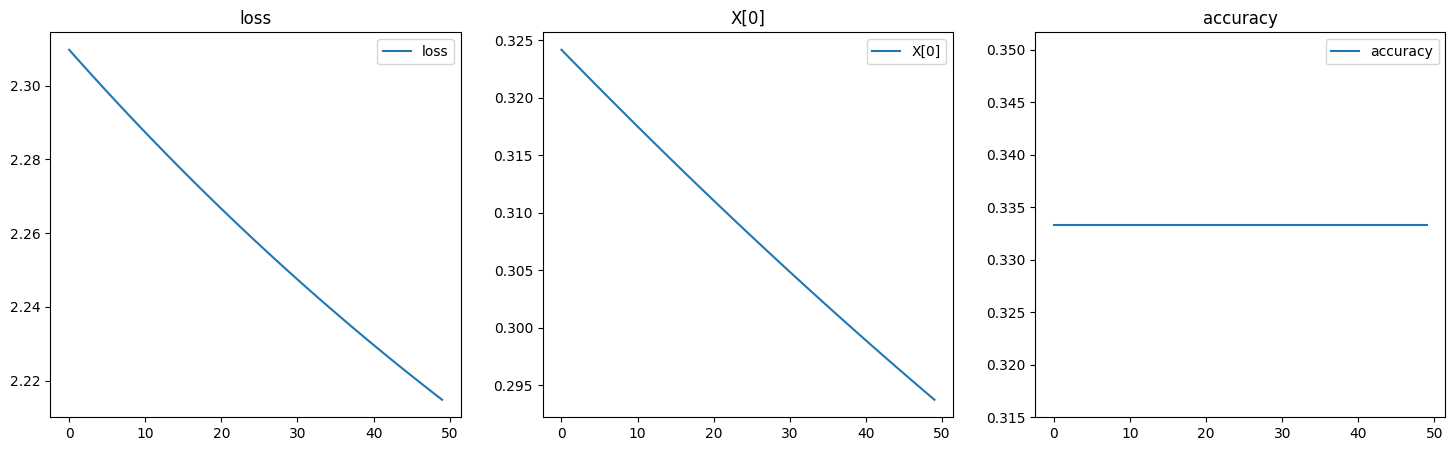

In [44]:
plot(history)

In [45]:
Y_pred = model.predict(X)
accuracy(Y_pred, Y)

0.3333333333333333

In [46]:
# With a more sophisticated model
NN_ARCHITECTURE = [
    {"input_dim": X.shape[1], "output_dim": 5, "activation": "relu"},
    {"input_dim": 5, "output_dim": Y.shape[1], "activation": "softmax"},
]

In [47]:
model = Model(NN_ARCHITECTURE)
model.summary()

output Shape.          Param #
(None, 5) 		 155
(None, 3) 		 18


In [48]:
model.compile("categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, 50, 0.01)

train: (3, 30) (3, 3)
epoch 1, loss 2.149
epoch 2, loss 2.149
epoch 3, loss 2.149
epoch 4, loss 2.148
epoch 5, loss 2.148
epoch 6, loss 2.148
epoch 7, loss 2.147
epoch 8, loss 2.147
epoch 9, loss 2.147
epoch 10, loss 2.146
epoch 11, loss 2.146
epoch 12, loss 2.146
epoch 13, loss 2.145
epoch 14, loss 2.145
epoch 15, loss 2.145
epoch 16, loss 2.144
epoch 17, loss 2.144
epoch 18, loss 2.144
epoch 19, loss 2.144
epoch 20, loss 2.143
epoch 21, loss 2.143
epoch 22, loss 2.143
epoch 23, loss 2.143
epoch 24, loss 2.142
epoch 25, loss 2.142
epoch 26, loss 2.142
epoch 27, loss 2.142
epoch 28, loss 2.141
epoch 29, loss 2.141
epoch 30, loss 2.141
epoch 31, loss 2.141
epoch 32, loss 2.141
epoch 33, loss 2.140
epoch 34, loss 2.140
epoch 35, loss 2.140
epoch 36, loss 2.140
epoch 37, loss 2.139
epoch 38, loss 2.139
epoch 39, loss 2.139
epoch 40, loss 2.139
epoch 41, loss 2.138
epoch 42, loss 2.138
epoch 43, loss 2.138
epoch 44, loss 2.138
epoch 45, loss 2.137
epoch 46, loss 2.137
epoch 47, loss 2.137


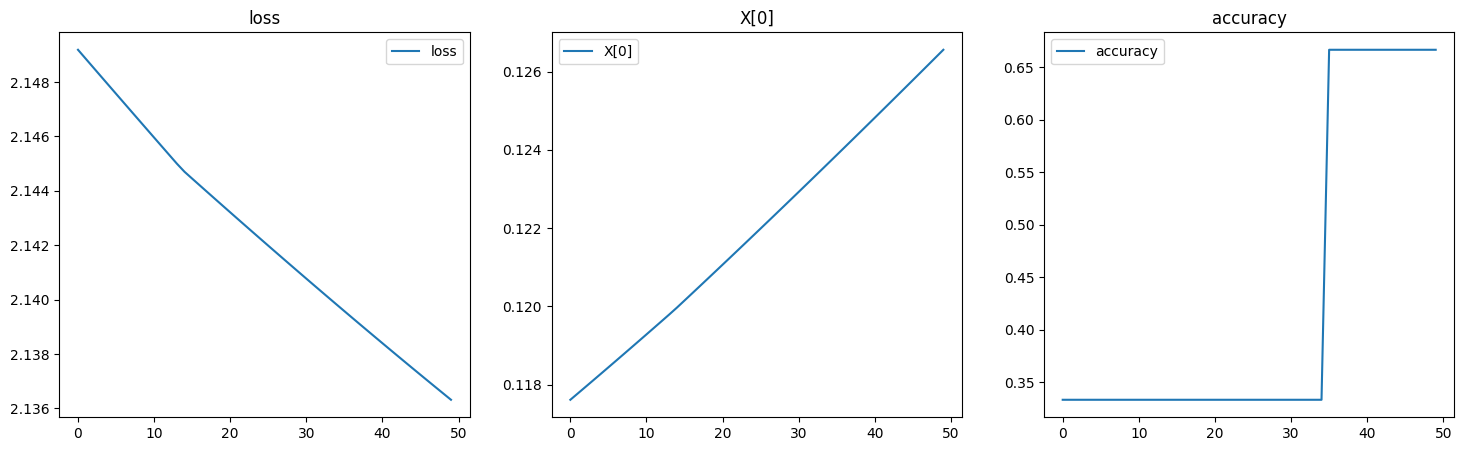

In [49]:
plot(history)

In [50]:
Y_pred = model.predict(X)
accuracy(Y_pred, Y)

0.6666666666666666

## Apply to a more sophisticated dataset and network

In [51]:
# number of samples in the data set
N_SAMPLES = 1000
# ratio between training and test sets
TEST_SIZE = 0.2

In [52]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = N_SAMPLES, noise=0.2, random_state=100)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=42)
X.shape, y.shape

((1000, 2), (1000, 1))

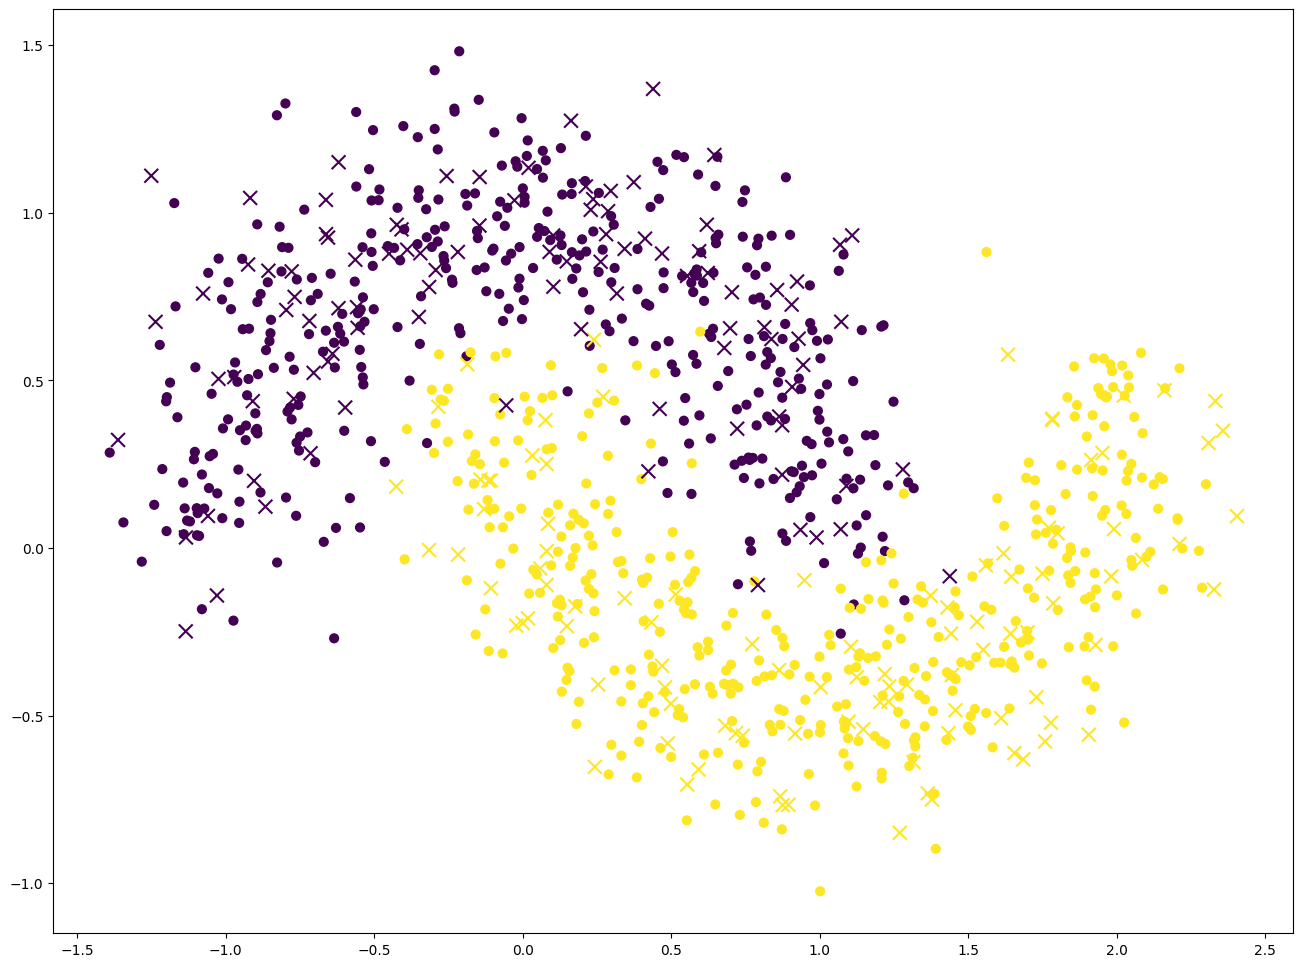

In [53]:
# Plot the dataset
plt.figure(figsize=(16,12))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=40)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(), marker='x', s=100)

Architecture of the network to be built

<img src="https://github.com/SkalskiP/ILearnDeepLearning.py/raw/a55b2af0e9f0776d62b74ea458b9cbdc2976d1cc/01_mysteries_of_neural_networks/03_numpy_neural_net/supporting_visualizations/nn_architecture.png" alt="drawing" width="600"/>

In [54]:
NN_ARCHITECTURE = [
    {"input_dim": X_train.shape[1], "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 6, "activation": "relu"},
    {"input_dim": 6, "output_dim": 6, "activation": "relu"},
    {"input_dim": 6, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": y_train.shape[1], "activation": "sigmoid"},
]

In [55]:
params_values = init_layers(NN_ARCHITECTURE)
Y_pred, memory = full_forward_propagation(X_train, params_values, NN_ARCHITECTURE)
# step backward - calculating gradient
print("Y_pred", Y_pred.shape, "y_train", y_train.shape)
grads_values = full_backward_propagation(Y_pred, y_train, memory, params_values, NN_ARCHITECTURE, "binary_crossentropy")
# updating model state
params_values = update(params_values, grads_values, NN_ARCHITECTURE, lr)

Y_pred (800, 1) y_train (800, 1)


In [56]:
model = Model(NN_ARCHITECTURE)
model.compile("binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, 1000, 0.1)

train: (800, 2) (800, 1)
epoch 1, loss 0.703
epoch 2, loss 0.878
epoch 3, loss 2.174
epoch 4, loss 2.712
epoch 5, loss 2.259
epoch 6, loss 2.647
epoch 7, loss 2.318
epoch 8, loss 2.600
epoch 9, loss 2.359
epoch 10, loss 2.566
epoch 11, loss 2.389
epoch 12, loss 2.541
epoch 13, loss 2.411
epoch 14, loss 2.522
epoch 15, loss 2.427
epoch 16, loss 2.509
epoch 17, loss 2.439
epoch 18, loss 2.499
epoch 19, loss 2.448
epoch 20, loss 2.492
epoch 21, loss 2.454
epoch 22, loss 2.486
epoch 23, loss 2.458
epoch 24, loss 2.482
epoch 25, loss 2.462
epoch 26, loss 2.479
epoch 27, loss 2.464
epoch 28, loss 2.477
epoch 29, loss 2.466
epoch 30, loss 2.476
epoch 31, loss 2.468
epoch 32, loss 2.474
epoch 33, loss 2.469
epoch 34, loss 2.474
epoch 35, loss 2.469
epoch 36, loss 2.473
epoch 37, loss 2.470
epoch 38, loss 2.473
epoch 39, loss 2.470
epoch 40, loss 2.472
epoch 41, loss 2.470
epoch 42, loss 2.472
epoch 43, loss 2.471
epoch 44, loss 2.472
epoch 45, loss 2.471
epoch 46, loss 2.472
epoch 47, loss 2.4

epoch 519, loss 2.471
epoch 520, loss 2.471
epoch 521, loss 2.471
epoch 522, loss 2.471
epoch 523, loss 2.471
epoch 524, loss 2.471
epoch 525, loss 2.471
epoch 526, loss 2.471
epoch 527, loss 2.471
epoch 528, loss 2.471
epoch 529, loss 2.471
epoch 530, loss 2.471
epoch 531, loss 2.471
epoch 532, loss 2.471
epoch 533, loss 2.471
epoch 534, loss 2.471
epoch 535, loss 2.471
epoch 536, loss 2.471
epoch 537, loss 2.471
epoch 538, loss 2.471
epoch 539, loss 2.471
epoch 540, loss 2.471
epoch 541, loss 2.471
epoch 542, loss 2.471
epoch 543, loss 2.471
epoch 544, loss 2.471
epoch 545, loss 2.471
epoch 546, loss 2.471
epoch 547, loss 2.471
epoch 548, loss 2.471
epoch 549, loss 2.471
epoch 550, loss 2.471
epoch 551, loss 2.471
epoch 552, loss 2.471
epoch 553, loss 2.471
epoch 554, loss 2.471
epoch 555, loss 2.471
epoch 556, loss 2.471
epoch 557, loss 2.471
epoch 558, loss 2.471
epoch 559, loss 2.471
epoch 560, loss 2.471
epoch 561, loss 2.471
epoch 562, loss 2.471
epoch 563, loss 2.471
epoch 564,

In [57]:
y_pred = model.predict(X_train)
y_pred[:10]

array([[0.00718806],
       [0.00718806],
       [0.00718806],
       [0.00718806],
       [0.00718806],
       [0.00718806],
       [0.00718806],
       [0.00718806],
       [0.00718806],
       [0.00718806]])

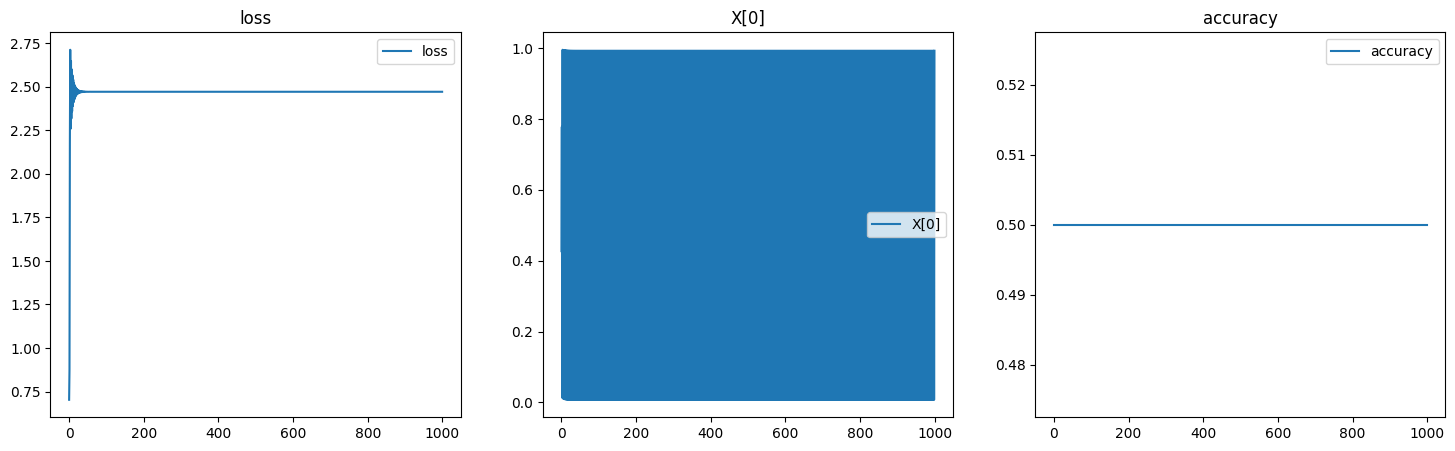

In [58]:
plot(history)

In [59]:
y_pred = model.predict(X_test)
print(accuracy(y_pred, y_test))

0.5


In [60]:
# Same architecture
# but New learning rate and val set
model.compile("binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, 500, 0.001, validation_split=0.2)

val: (160, 2) (160, 1)
train: (640, 2) (640, 1)
epoch 1, loss 0.703, val_loss 0.702
epoch 2, loss 0.702, val_loss 0.700
epoch 3, loss 0.700, val_loss 0.699
epoch 4, loss 0.699, val_loss 0.698
epoch 5, loss 0.698, val_loss 0.698
epoch 6, loss 0.698, val_loss 0.697
epoch 7, loss 0.697, val_loss 0.697
epoch 8, loss 0.697, val_loss 0.696
epoch 9, loss 0.696, val_loss 0.696
epoch 10, loss 0.696, val_loss 0.695
epoch 11, loss 0.695, val_loss 0.695
epoch 12, loss 0.695, val_loss 0.695
epoch 13, loss 0.695, val_loss 0.694
epoch 14, loss 0.694, val_loss 0.694
epoch 15, loss 0.694, val_loss 0.694
epoch 16, loss 0.694, val_loss 0.693
epoch 17, loss 0.693, val_loss 0.693
epoch 18, loss 0.693, val_loss 0.693
epoch 19, loss 0.693, val_loss 0.693
epoch 20, loss 0.693, val_loss 0.693
epoch 21, loss 0.693, val_loss 0.693
epoch 22, loss 0.692, val_loss 0.692
epoch 23, loss 0.692, val_loss 0.692
epoch 24, loss 0.692, val_loss 0.692
epoch 25, loss 0.692, val_loss 0.692
epoch 26, loss 0.692, val_loss 0.692

epoch 428, loss 0.269, val_loss 0.311
epoch 429, loss 0.268, val_loss 0.311
epoch 430, loss 0.268, val_loss 0.311
epoch 431, loss 0.268, val_loss 0.311
epoch 432, loss 0.268, val_loss 0.310
epoch 433, loss 0.268, val_loss 0.310
epoch 434, loss 0.267, val_loss 0.310
epoch 435, loss 0.267, val_loss 0.310
epoch 436, loss 0.267, val_loss 0.310
epoch 437, loss 0.267, val_loss 0.310
epoch 438, loss 0.267, val_loss 0.309
epoch 439, loss 0.267, val_loss 0.309
epoch 440, loss 0.266, val_loss 0.309
epoch 441, loss 0.266, val_loss 0.309
epoch 442, loss 0.266, val_loss 0.309
epoch 443, loss 0.266, val_loss 0.309
epoch 444, loss 0.266, val_loss 0.308
epoch 445, loss 0.266, val_loss 0.308
epoch 446, loss 0.266, val_loss 0.308
epoch 447, loss 0.265, val_loss 0.308
epoch 448, loss 0.265, val_loss 0.308
epoch 449, loss 0.265, val_loss 0.308
epoch 450, loss 0.265, val_loss 0.307
epoch 451, loss 0.265, val_loss 0.307
epoch 452, loss 0.265, val_loss 0.307
epoch 453, loss 0.264, val_loss 0.307
epoch 454, l

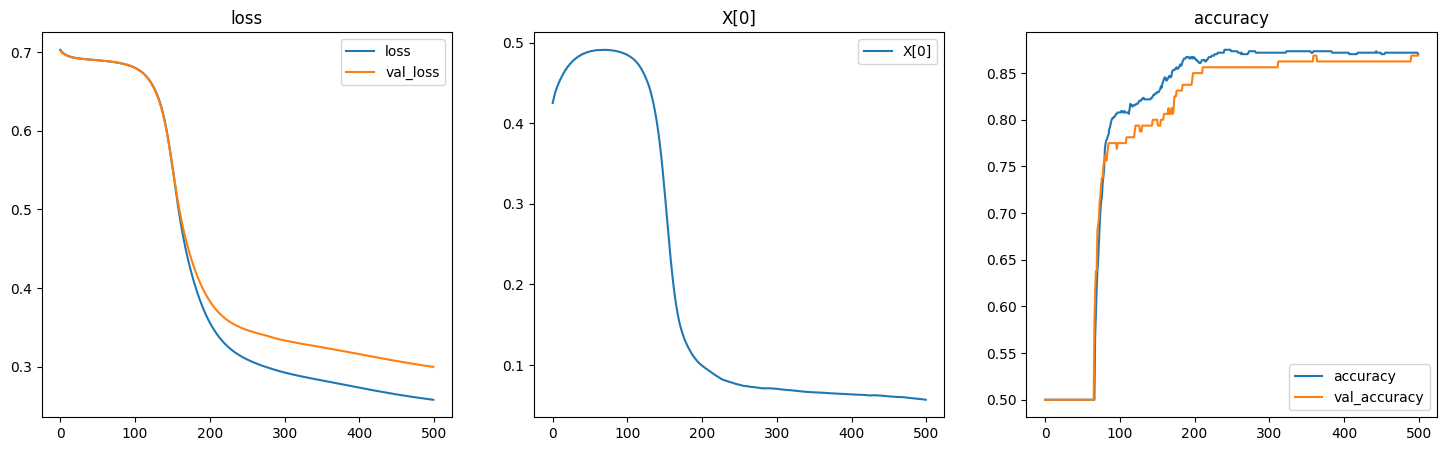

In [61]:
plot(history)

In [62]:
y_pred = model.predict(X_test)
print(accuracy(y_pred, y_test))

0.915


## Same model with Keras - Tensorflow

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import initializers

from sklearn.metrics import accuracy_score

In [64]:
# Building a model
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], kernel_initializer=initializers.RandomNormal(stddev=0.2), activation='relu'))
model.add(Dense(6, kernel_initializer=initializers.RandomNormal(stddev=0.2), activation='relu'))
model.add(Dense(6, kernel_initializer=initializers.RandomNormal(stddev=0.2), activation='relu'))
model.add(Dense(4, kernel_initializer=initializers.RandomNormal(stddev=0.2), activation='relu'))
model.add(Dense(y_train.shape[1], kernel_initializer=initializers.RandomNormal(stddev=0.2), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 30        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Training
history = model.fit(X_train, y_train, batch_size=len(X_train), validation_split=0.2, epochs=500, verbose=0)

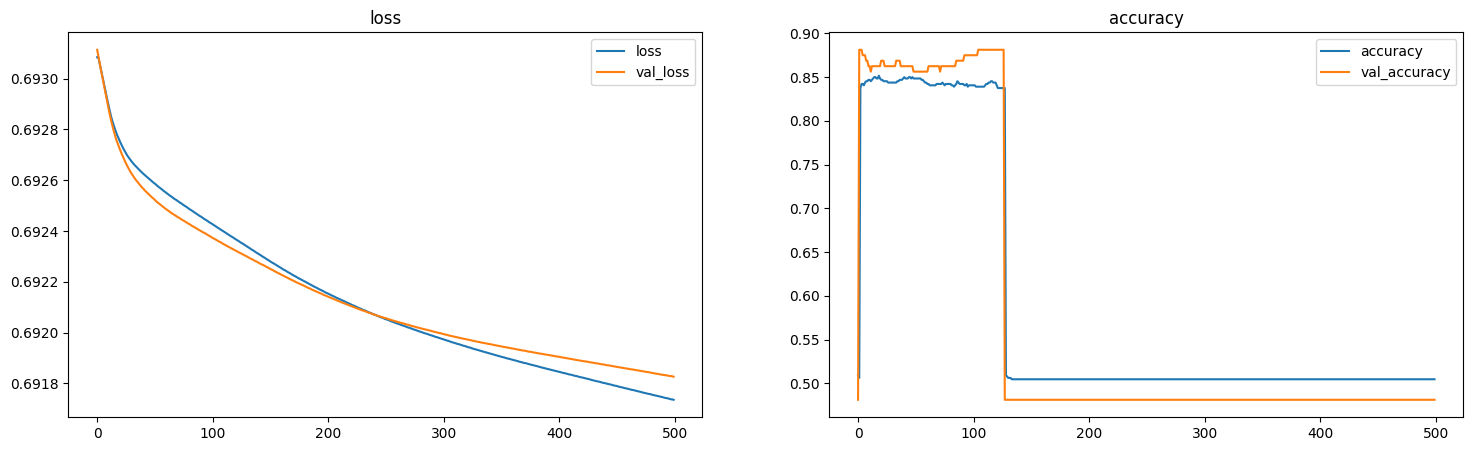

In [66]:
plot(history.history)

In [67]:
Y_pred = model.predict(X_test)

7/7 [==============================] - 2s 2ms/step


In [68]:
acc_test = accuracy(Y_pred, y_test)
print("Test set accuracy: {:.2f}".format(acc_test))

Test set accuracy: 0.50


In [69]:
accuracy_score(np.argmax(Y_pred, axis=-1), y_test)
print("Test set accuracy: {:.2f}".format(acc_test))

Test set accuracy: 0.50


## Improve the code for regression problems

In [70]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

N_SAMPLES = 100
X, y = make_regression(n_samples=N_SAMPLES, n_features=1, noise=10.0, random_state=100)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)
X.shape, y.shape

((100, 1), (100, 1))

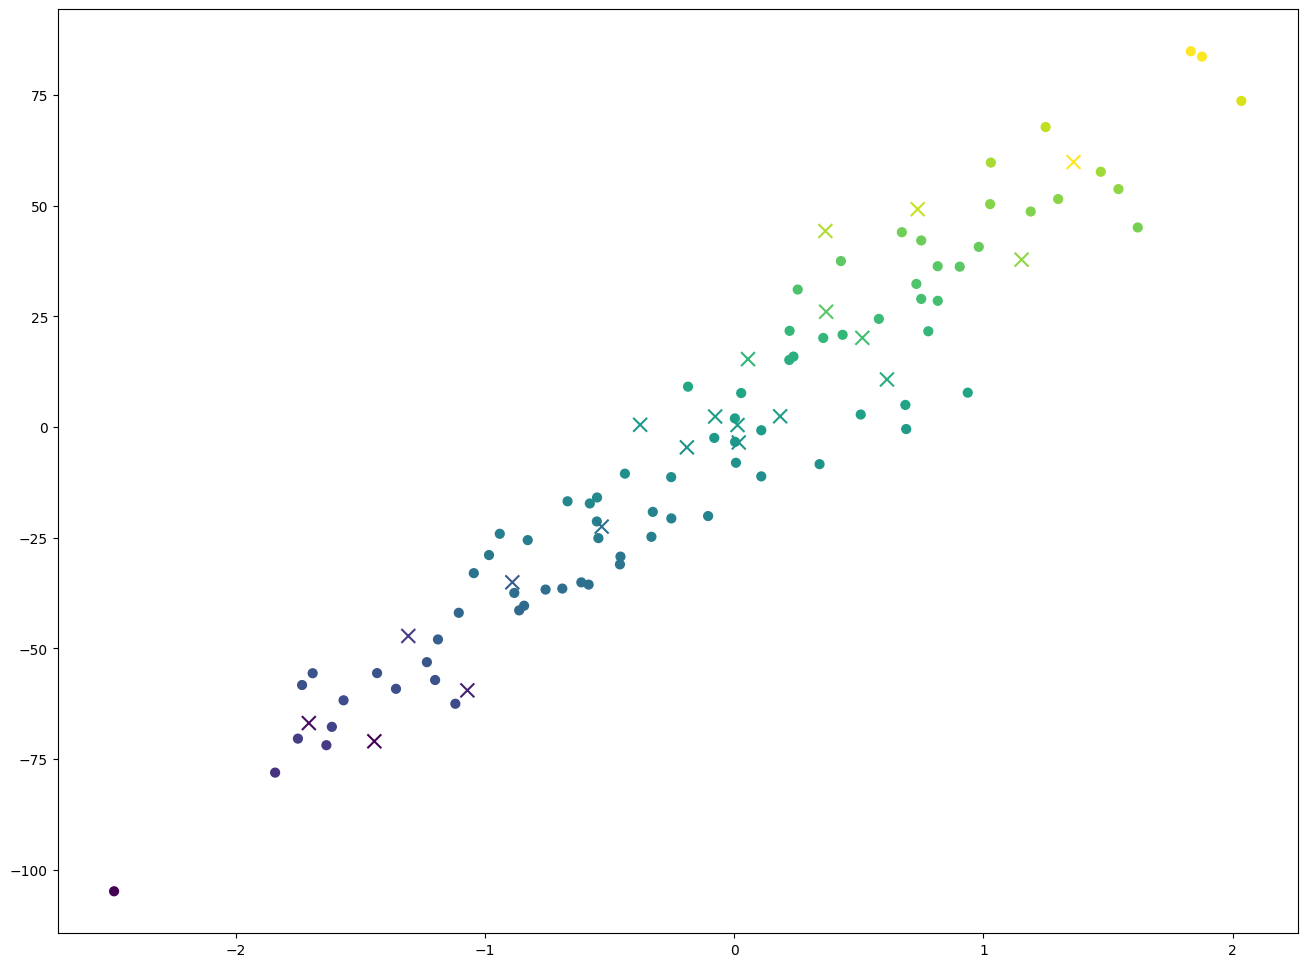

In [71]:
# Plot the dataset
plt.figure(figsize=(16,12))
plt.scatter(X_train[:, 0], y_train[:, 0], c=y_train.ravel(), s=40)
plt.scatter(X_test[:, 0], y_test[:, 0], c=y_test.ravel(), marker='x', s=100)

Modify the code "NN from scratch" in order to define a NN for this dataset

* <font color="red">To know what to modify in the previous code (NN from scratch), it is important to know :</font>
    * <font color="red">whether it is a classification or regression problem</font>
        * **Classification**
            * last layer = softmax -> need the derivative of sigmoid
            * Loss function = cross entropy -> need the derivative
            * Metrics = accuracy 
        * **Regression**
            *last layer = linear -> need derivative of linear
            * Loss function = MAE or MSE -> need derivative
            * metrics = MAE or MSE

    

In [72]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

N_SAMPLES = 100

TEST_SIZE = 0.2

X, y = make_regression(n_samples=N_SAMPLES, n_features=1, noise=10.0, random_state=100)
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

regressor = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000, solver='lbfgs')

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#metric mse cuz regression problem
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error: 143.1849
R2 Score: 0.8970


C:\Users\paul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Try the digit dataset with Keras

In [73]:
from sklearn import datasets

digits = datasets.load_digits()

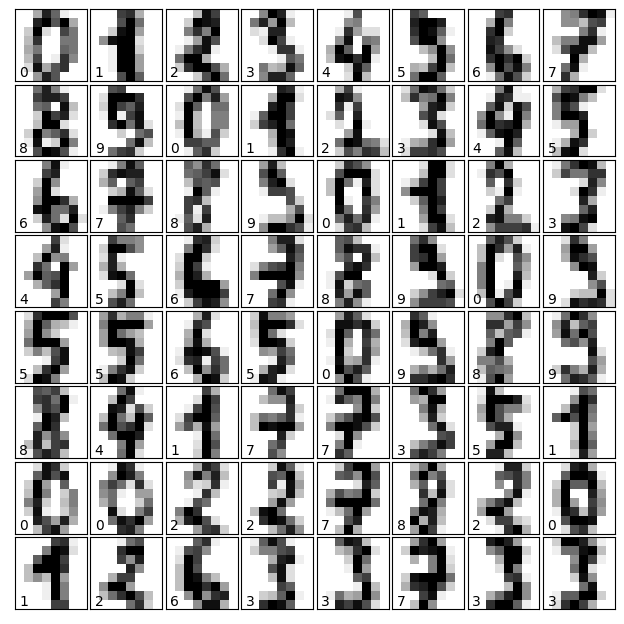

In [74]:
import matplotlib.pyplot as plt

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.2, random_state=1)
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [76]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(y_train.reshape(-1, 1))
y_train = ohe.transform(y_train.reshape(-1, 1))
y_test = ohe.transform(y_test.reshape(-1, 1))
y_train.shape

C:\Users\paul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(1437, 10)

<font color="red">Build a Keras model, fit them, babysit them and evaluate them</font>

In [77]:
# Build a Keras model whith hidden layers=[25, 50, 50, 25]
model = Sequential()

model.add(Dense(25, input_shape=(X_train.shape[1],), kernel_initializer=initializers.RandomNormal(stddev=0.2), activation='relu'))
model.add(Dense(50, kernel_initializer=initializers.RandomNormal(stddev=0.2), activation='relu'))
model.add(Dense(50, kernel_initializer=initializers.RandomNormal(stddev=0.2), activation='relu'))
model.add(Dense(25, kernel_initializer=initializers.RandomNormal(stddev=0.2), activation='relu'))
model.add(Dense(y_train.shape[1], kernel_initializer=initializers.RandomNormal(stddev=0.2), activation='softmax'))





In [78]:
# Compile the model --> Choose loss, metrics and optimizer
# model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [79]:
# Check the number of parameters (model.summary())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 25)                1625      
                                                                 
 dense_6 (Dense)             (None, 50)                1300      
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 25)                1275      
                                                                 
 dense_9 (Dense)             (None, 10)                260       
                                                                 
Total params: 7,010
Trainable params: 7,010
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Train the model - validation split=0.2
history = model.fit(X_train, y_train, batch_size=len(X_train), validation_split=0.2, epochs=500, verbose=0)

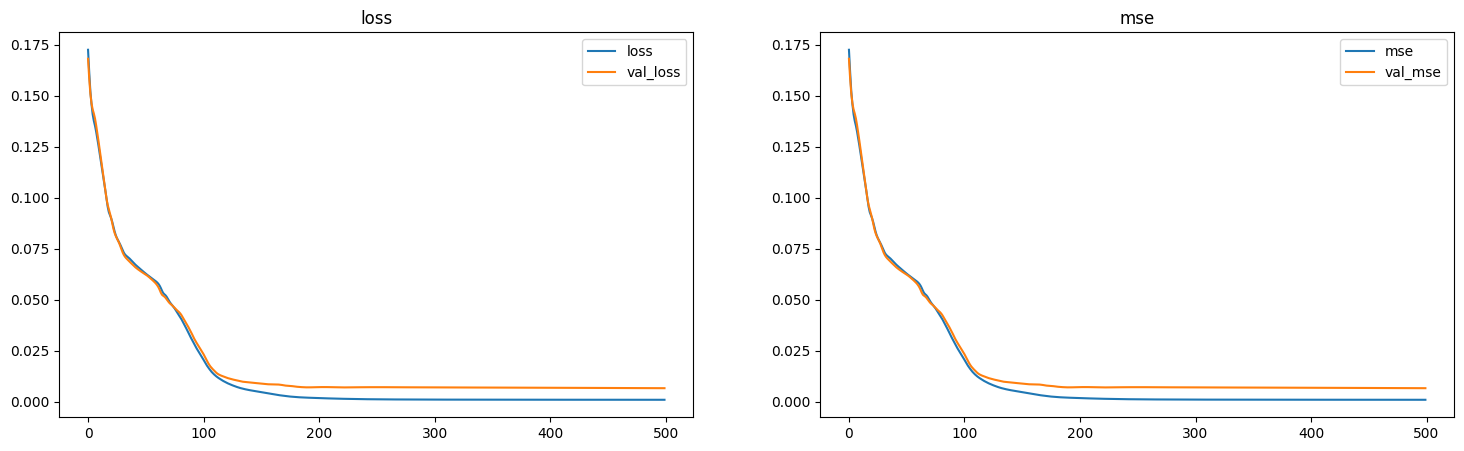

dict

In [86]:
# Babysit the model
plot(history.history)

type((history.history))

In [82]:
# Evaluate the model
Y_pred = model.predict(X_test)
accuracy(y_pred,y_train)


12/12 [==============================] - 0s 2ms/step


AssertionError: 